# Marketing

## 1. Linear Regression

### a. Đọc dữ liệu

In [156]:
library('Amelia')
library('ggplot2')
library('gridExtra')
library('ggExtra')
library('BMA')

In [1]:
df = read.csv('data/marketing.csv')
head(df)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


### b. Xem thông tin chung từ dữ liệu: số dòng, số cột, summary, str

In [2]:
print(paste('Number of rows:', dim(df)[1]))
print(paste('Number of columns:', dim(df)[2]))

[1] "Number of rows: 200"
[1] "Number of columns: 4"


In [3]:
summary(df)

    youtube          facebook       newspaper          sales      
 Min.   :  0.84   Min.   : 0.00   Min.   :  0.36   Min.   : 1.92  
 1st Qu.: 89.25   1st Qu.:11.97   1st Qu.: 15.30   1st Qu.:12.45  
 Median :179.70   Median :27.48   Median : 30.90   Median :15.48  
 Mean   :176.45   Mean   :27.92   Mean   : 36.66   Mean   :16.83  
 3rd Qu.:262.59   3rd Qu.:43.83   3rd Qu.: 54.12   3rd Qu.:20.88  
 Max.   :355.68   Max.   :59.52   Max.   :136.80   Max.   :32.40  

In [4]:
str(df)

'data.frame':	200 obs. of  4 variables:
 $ youtube  : num  276.1 53.4 20.6 181.8 217 ...
 $ facebook : num  45.4 47.2 55.1 49.6 13 ...
 $ newspaper: num  83 54.1 83.2 70.2 70.1 ...
 $ sales    : num  26.5 12.5 11.2 22.2 15.5 ...


### c. Vẽ biểu đồ quan sát mối liên hệ giữa sales và youtube

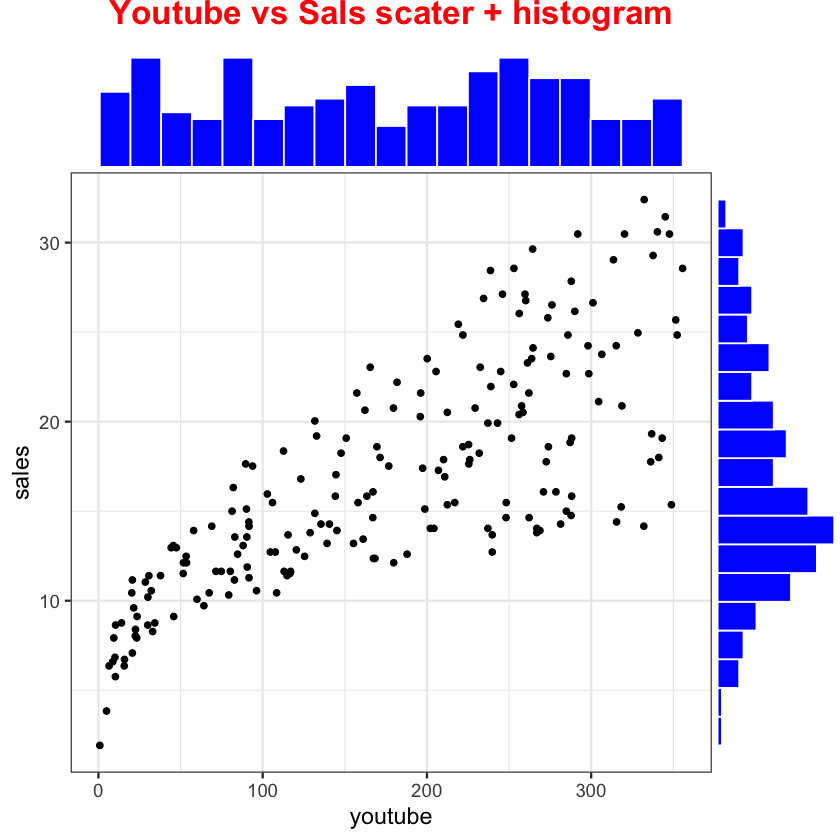

In [21]:
plot = ggplot(data = df, aes(x = youtube, y = sales)) + 
        geom_point() + theme_bw(base_size=14) +
        ggtitle("Youtube vs Sals scater + histogram") +
        theme(plot.title = element_text(color='red', size=20, face='bold', hjust=0.5))

ggMarginal(plot, type = 'histogram', col = 'white', fill = 'blue', bins = 20)

In [33]:
cor(df)

,youtube,sales
youtube,1.0000000,0.7822244
sales,0.7822244,1.0000000


Nhận xét: 
- Có mối tương quan thuận khá lớn (corr=0.78) giữa **youtube** và **sales**
- Tuy nhiên độ phân tán (varriance) giữa 2 biến ngày càng lớn với feature youtube càng lớn
- Phân phối features youtube là khá đều
- Phân phối sales khá giống phân phối chuẩn
- Sẽ cần scale data trước khi đưa vào model đối với Linear Regression

### c. Tiền xử lý dữ liệu

Vì chỉ sử dụng feature **youtube** để dự đoán **sales** nên tiến hành bỏ đi các cột không liên quan

In [5]:
df = df[, c(1, 4)]
head(df)

,youtube,sales
,<dbl>,<dbl>
1,276.12,26.52
2,53.40,12.48
3,20.64,11.16
4,181.80,22.20
5,216.96,15.48
6,10.44,8.64


Check missing values

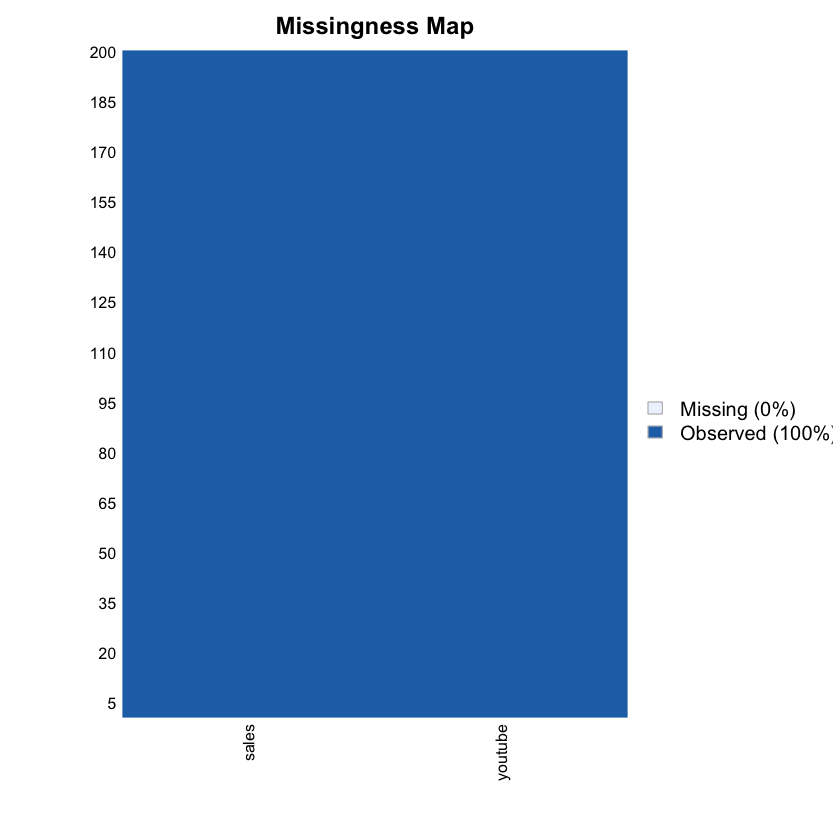

In [10]:
missmap(df)

Nhận xét: 
- Không có missing values

Tiến hành scale dữ liệu

In [50]:
x = df$youtube
df_scaled = data.frame(youtube = (x-mean(x))/sd(x), sales = df$sales)
head(df_scaled, 3)

,youtube,sales
,<dbl>,<dbl>
1,0.9674246,26.52
2,-1.1943790,12.48
3,-1.5123599,11.16


### d. Kiểm tra và xử lý outliers

Lưu ý chỉ check outlier của biến input x, ở đây là **youtube**

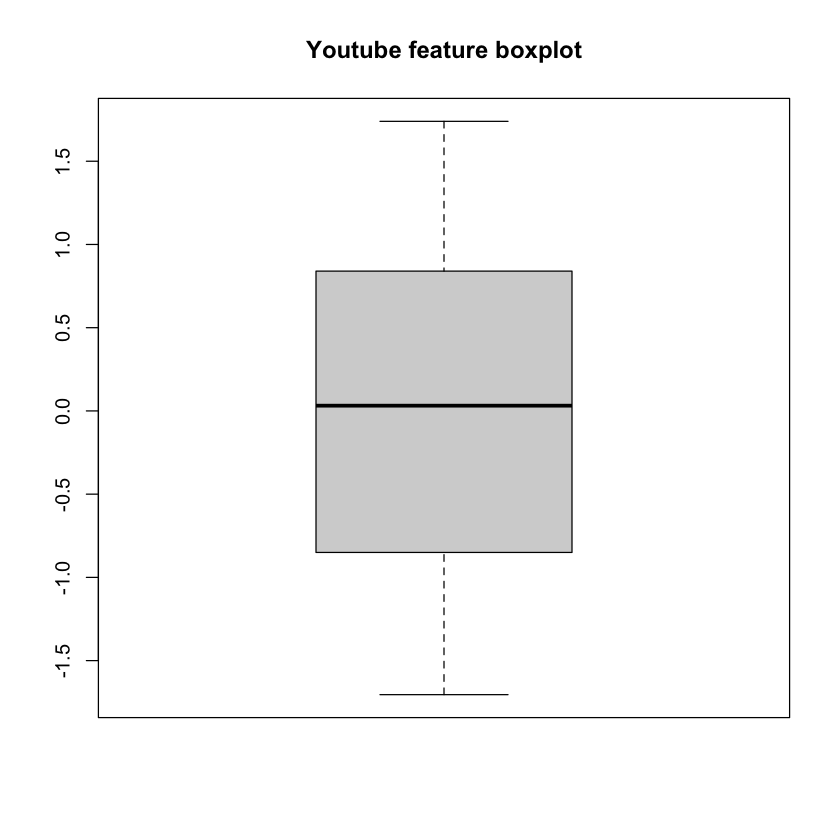

In [32]:
boxplot(df_scaled$youtube, main = 'Youtube feature boxplot')

Nhận xét:
- Không có outlier

### f. Tạo train - test từ dữ liệu data với tỷ lệ 70:30

In [51]:
set.seed(1)

train_idx = sample(1:nrow(df_scaled), 0.7*nrow(df_scaled))
train_df = df_scaled[train_idx,]
test_df = df_scaled[-train_idx,]
print(dim(train_df))
print(dim(test_df))

[1] 140   2
[1] 60  2


### g. Thực hiện Linear Regression với train data

In [82]:
model = lm(sales ~ youtube, data=train_df)

### h. In summary của model

In [83]:
summary(model)


Call:
lm(formula = sales ~ youtube, data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.2963  -2.2665  -0.2196   2.5119   8.5300 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  16.8796     0.3355   50.32   <2e-16 ***
youtube       5.0170     0.3345   15.00   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.969 on 138 degrees of freedom
Multiple R-squared:  0.6197,	Adjusted R-squared:  0.617 
F-statistic: 224.9 on 1 and 138 DF,  p-value: < 2.2e-16


Nhận xét:
- Độ tin cậy của model đối với biến youtube là khá tốt
- R-squared khoảng tầm 61.97%, chỉ ra được với chỉ 1 mình biến youtube, features chưa thật sự đủ để tạo model với độ chính xác cao

### i. Dự đoán y_test_predict từ test_data => so sánh y_test_pred với y_test
### j. Tính MSE, R2 train, test. Nhận xét

In [84]:
train_mse = mean(model$residuals^2)
train_rmse = sqrt(train_mse)
print(paste('Train MSE : ',round(train_mse,4)))
print(paste('Train RMSE: ',round(train_rmse,4)))

[1] "Train MSE :  15.5289"
[1] "Train RMSE:  3.9407"


In [85]:
predictions = predict(model, test_df)
test_mse = mean((test_df$sales - predictions)^2)
test_rmse = sqrt(test_mse)
print(paste('Test MSE : ',round(test_mse,4)))
print(paste('Test RMSE: ',round(test_rmse,4)))

[1] "Test MSE :  14.2834"
[1] "Test RMSE:  3.7793"


In [86]:
test_rmse/mean(test_df$sales)

[1] 0.2275336

Nhận xét: 
- Kết quả dự đoán cho ra RMSE ở mức khá
- So sánh test-RMSE với trung bình của các dữ liệu ở mức 22.7%, cho thấy model cần được cải thiện thêm
- Chệnh lệch giữa MSE, RMSE giữa train mà test không lớn, chứng tỏ model không bị overfiting

### k. Tìm Coefficients, Intercept

In [87]:
beta = coef(model)['youtube']
beta

youtube 
5.017013

In [88]:
intercept = coef(model)[1]
intercept

(Intercept) 
   16.87962

### l. Cho youtube lần lượt: x= c(100, 200, 300) => Dự đoán sales

In [89]:
x_new = c(100, 200, 300)
x_scaled = (x_new-mean(x_new))/sd(x_new)
y = predict(model, data.frame(youtube=x_scaled))
print(y)

       1        2        3 
11.86260 16.87962 21.89663 


### m. Trực quan hoá kết quả

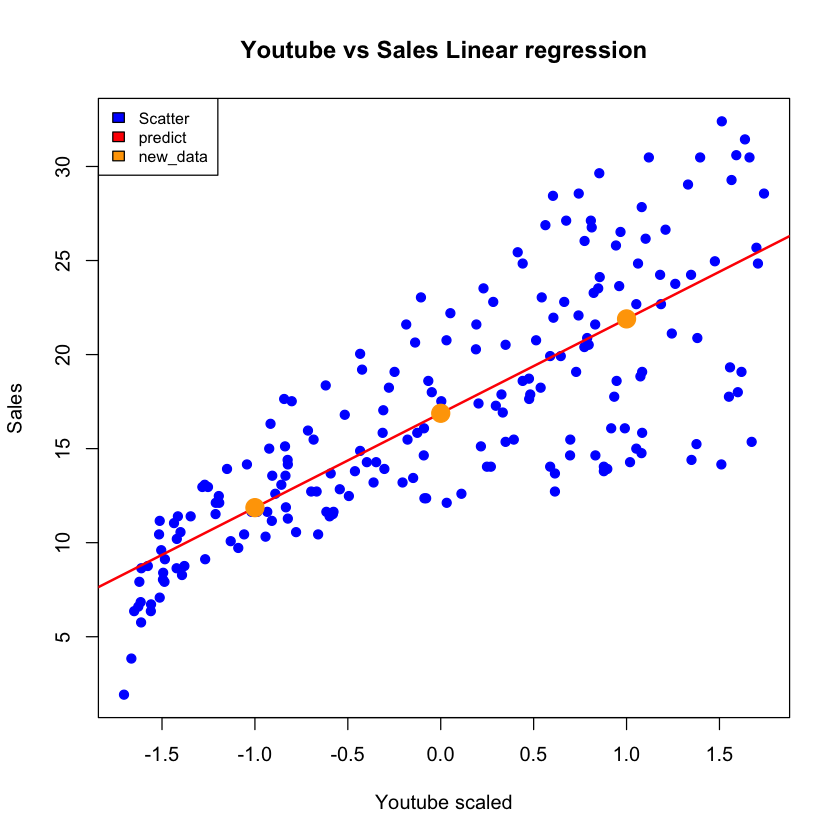

In [121]:
plot(df_scaled$youtube, df_scaled$sales, main = 'Youtube vs Sales Linear regression',
     xlab = 'Youtube scaled', ylab = 'Sales', col='blue', pch=19)
abline(model, df_scaled, col = 'red', lwd=2)
lines(x_scaled, y, col = 'orange', type = 'p', pch=19, cex = 2)
legend('topleft', c('Scatter', 'predict', 'new_data'), cex = 0.8, fill = c('blue', 'red', 'orange'))

## 2. Multiple variables Linear Regression

### a. Đọc lại dữ liệu full

In [123]:
df = read.csv('data/marketing.csv')
head(df)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,276.12,45.36,83.04,26.52
2,53.40,47.16,54.12,12.48
3,20.64,55.08,83.16,11.16
4,181.80,49.56,70.20,22.20
5,216.96,12.96,70.08,15.48
6,10.44,58.68,90.00,8.64


### b. Xem có missing data không?

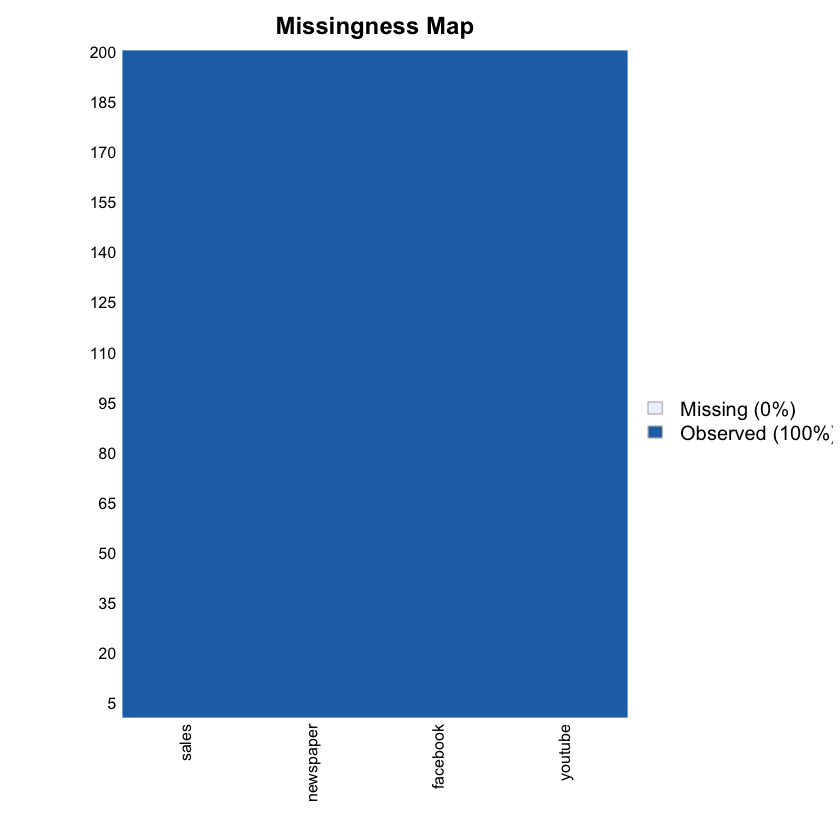

In [128]:
missmap(df)

Nhận xét:
- Không có missing data

### c. Xem mối tương quan giữa các biến với output

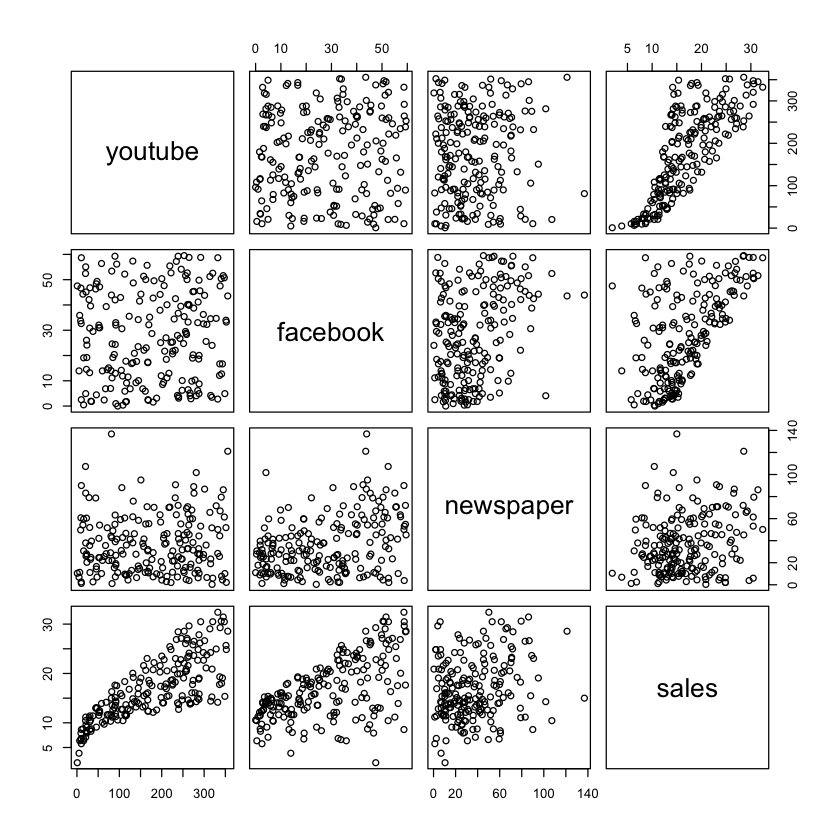

In [129]:
pairs(~., data=df)

In [124]:
correlation = cor(df)
correlation

,youtube,facebook,newspaper,sales
youtube,1.00000000,0.05480866,0.05664787,0.7822244
facebook,0.05480866,1.00000000,0.35410375,0.5762226
newspaper,0.05664787,0.35410375,1.00000000,0.2282990
sales,0.78222442,0.57622257,0.22829903,1.0000000


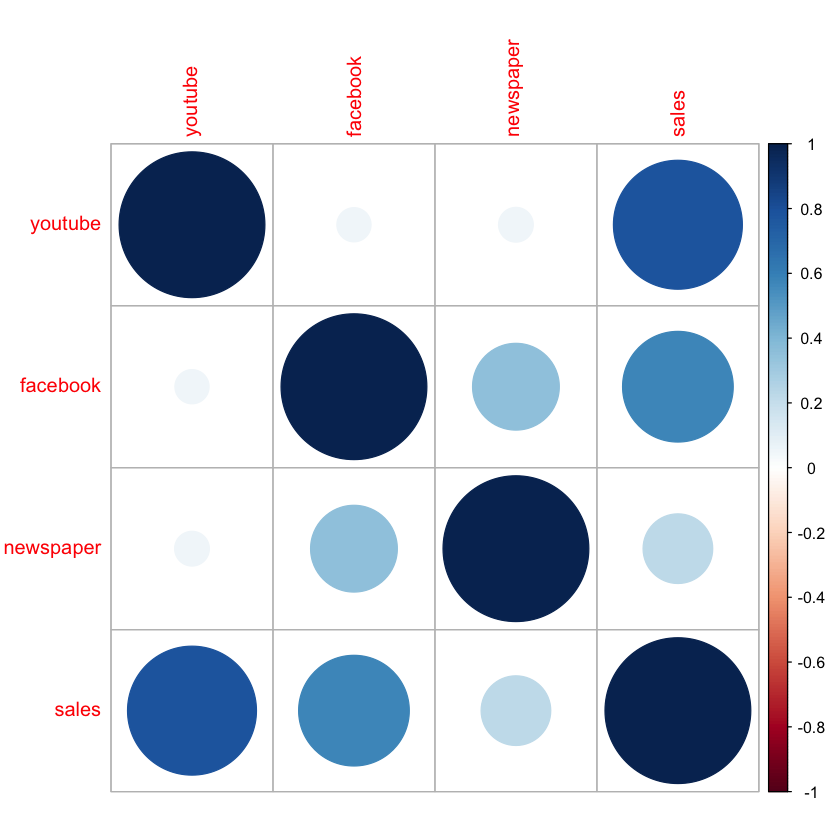

In [125]:
corrplot(correlation)

Nhận xét:
- Các biến youtube và facebook có mối tương quan cao so với outout sales
- Biến newspaper có mối tương quan thấp
- Nên sử dụng BMA để tìm model phù hợp

### d. Kiểm tra Outliers

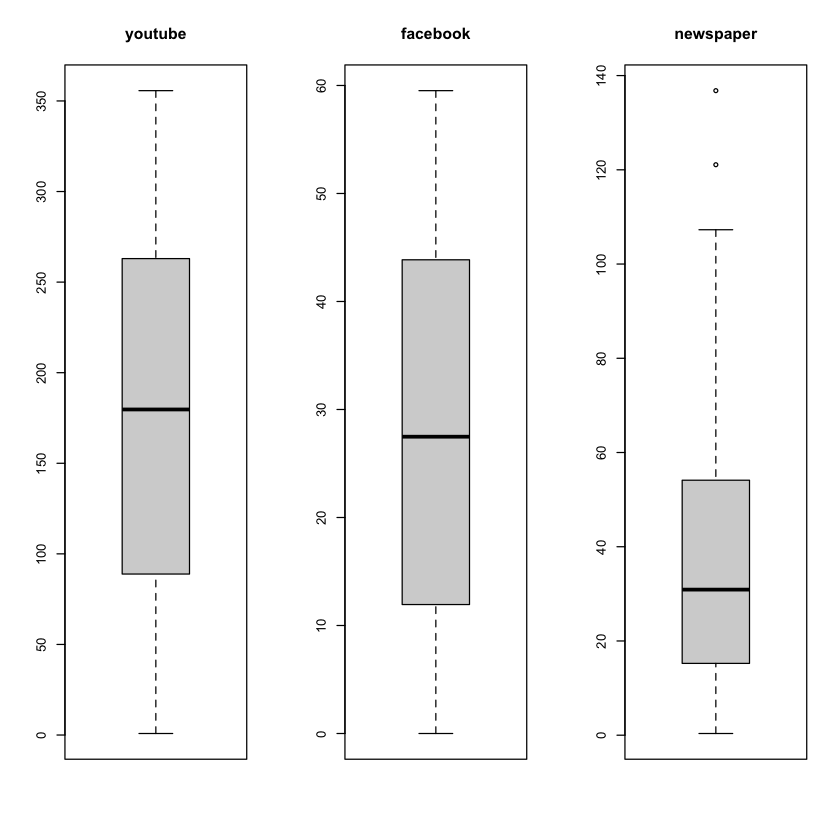

In [126]:
par(mfrow = c(1, 3))
boxplot(df$youtube, main = 'youtube')
boxplot(df$facebook, main = 'facebook')
boxplot(df$newspaper, main = 'newspaper')

Nhận xét: 
- Có outlier của biến newspaper
- Tuy nhiên sẽ sử dụng BMA trước, nếu không sử dụng feature newspaper thì không cần loại bỏ outlier này

### e. Scale dữ liệu trước khi đưa vào model

In [127]:
df_scaled = data.frame(youtube = (df$youtube-mean(df$youtube))/sd(df$youtube), 
                       facebook = (df$facebook-mean(df$facebook))/sd(df$facebook),
                       newspaper = (df$newspaper-mean(df$newspaper))/sd(df$newspaper),
                       sales = df$sales)
head(df_scaled, 3)

,youtube,facebook,newspaper,sales
,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9674246,0.9790656,1.7744925,26.52
2,-1.1943790,1.0800974,0.6679027,12.48
3,-1.5123599,1.5246374,1.7790842,11.16


### f. Sử dụng BMA để lựa chọn model

In [142]:
yvar = df_scaled[, 'sales']
xvars = df_scaled[, -4]
bma = bicreg(xvars, yvar, strict=F, OR=4)
summary(bma)


Call:
bicreg(x = xvars, y = yvar, strict = F, OR = 4)


  1  models were selected
 Best  1  models (cumulative posterior probability =  1 ): 

           p!=0   EV     SD      model 1 
Intercept  100   16.827  0.1427    16.827
youtube    100    4.714  0.1432     4.714
facebook   100    3.349  0.1432     3.349
newspaper    0    0.000  0.0000      .   
                                         
nVar                                  2  
r2                                  0.897
BIC                              -444.378
post prob                           1    


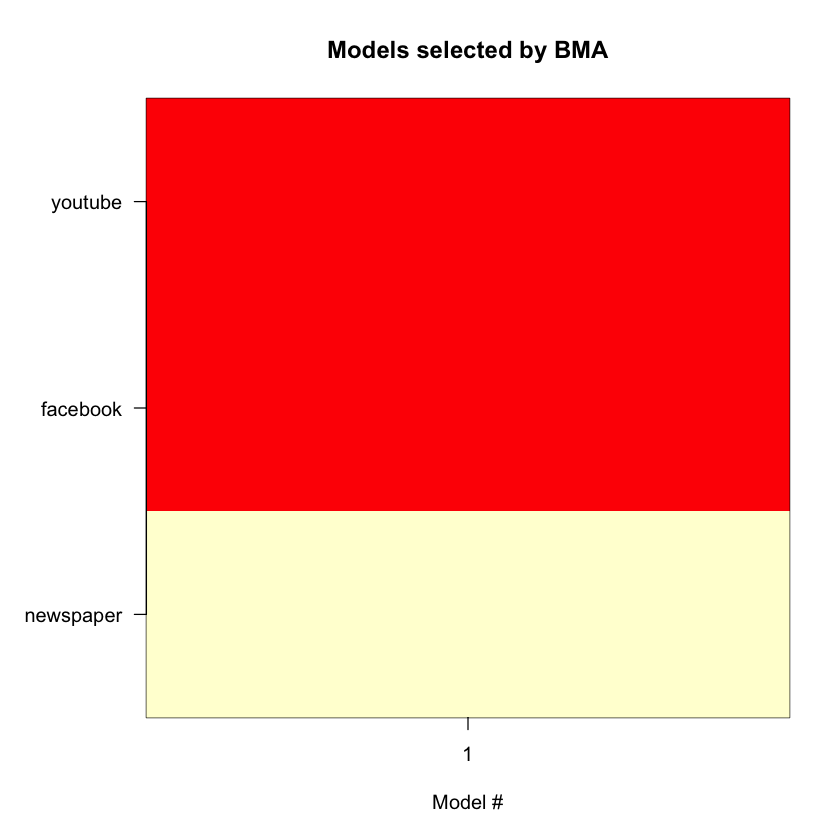

In [143]:
imageplot.bma(bma)

Nhận xét:
- Chỉ có 1 model tốt nhất được lựa chọn với 2 feature là youtube và facebook
- Vì sẽ loại bỏ feature newspaper nên không cần loại bỏ outlier

### g. Tách train-test data 

In [145]:
set.seed(1)

df_scaled$newspaper = NULL
train_idx = sample(1:nrow(df_scaled), 0.7*nrow(df_scaled))
train_df = df_scaled[train_idx,]
test_df = df_scaled[-train_idx,]
print(dim(train_df))
print(dim(test_df))

[1] 140   3
[1] 60  3


### h. Build model

In [147]:
model = lm(sales ~ youtube + facebook, data=train_df)
summary(model)


Call:
lm(formula = sales ~ youtube + facebook, data = train_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.8657  -1.0901   0.2372   1.3107   3.5278 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  16.8928     0.1702   99.25   <2e-16 ***
youtube       4.6698     0.1706   27.37   <2e-16 ***
facebook      3.5016     0.1753   19.98   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.014 on 137 degrees of freedom
Multiple R-squared:  0.9028,	Adjusted R-squared:  0.9014 
F-statistic: 636.3 on 2 and 137 DF,  p-value: < 2.2e-16


Nhận xét:
- Model cho kết quả tin cậy cao với tất cả các features, intercept
- R2 cao 90%, cải thiện rõ rệt so với model chỉ 1 biến youtube

### i. Tính MSE, RMSE cho train-test, nhận xét

In [148]:
train_mse = mean(model$residuals^2)
train_rmse = sqrt(train_mse)
print(paste('Train MSE : ',round(train_mse,4)))
print(paste('Train RMSE: ',round(train_rmse,4)))

[1] "Train MSE :  3.9687"
[1] "Train RMSE:  1.9922"


In [149]:
predictions = predict(model, test_df)
test_mse = mean((test_df$sales - predictions)^2)
test_rmse = sqrt(test_mse)
print(paste('Test MSE : ',round(test_mse,4)))
print(paste('Test RMSE: ',round(test_rmse,4)))

[1] "Test MSE :  4.201"
[1] "Test RMSE:  2.0496"


Nhận xét:
- Kết quả RMSE cải thiện rõ rệt so với model ban đầu
- Độ chênh lệch kết quả train-test metrics khá thấp, model không bị overfiting

### j. Coefficients, Intercept

In [155]:
beta_youtube = coef(model)['youtube']
beta_facebook = coef(model)['facebook']
intercept = coef(model)[1]
print(paste('Phương trình Linear Regression của model là:'))
print(paste('sales ~', round(intercept,2), '+', round(beta_youtube,2),'x youtube_scaled  + ', round(beta_facebook,2),'x facebook_scaled'))

[1] "Phương trình Linear Regression của model là:"
[1] "sales ~ 16.89 + 4.67 x youtube_scaled  +  3.5 x facebook_scaled"
